<a href="https://colab.research.google.com/github/vanshu1722/ADS-experiment/blob/main/ADS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data
from statsmodels.tsa.arima_model import ARMA
data=pd.read_csv("/content/INFY.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [ ]:
#Data Cleaning
infy_data=data.dropna()
infy_data.index=pd.to_datetime(infy_data.Date)

infy_data=infy_data["Prev Close"]['2013-01-01':'2013-12-2']
infy_data.describe()

count     230.000000
mean     2809.124783
std       338.441688
min      2212.000000
25%      2447.850000
50%      2858.375000
75%      3018.537500
max      3442.950000
Name: Prev Close, dtype: float64

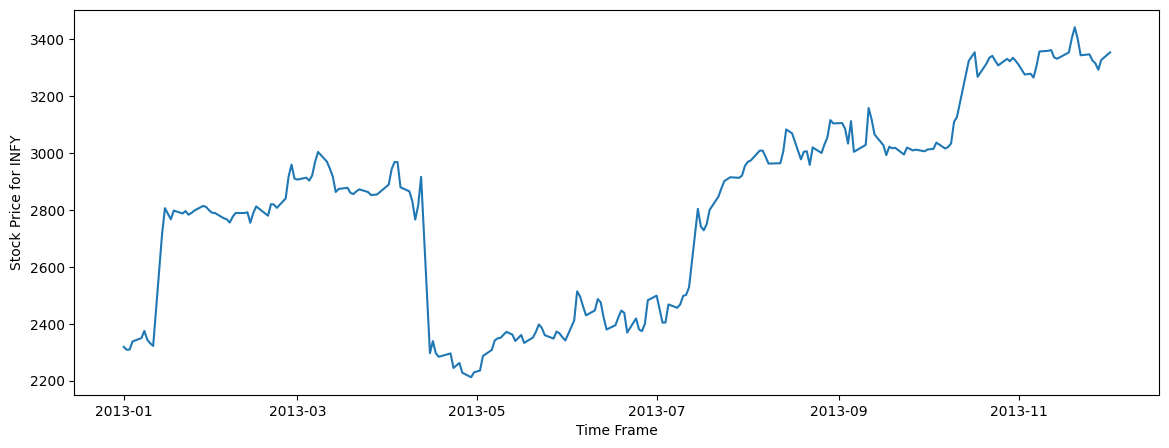

In [ ]:
#EDA
plt.figure(figsize=(14,5))
fig=plt.figure(1)
axl=fig.add_subplot(111)
axl.set_xlabel("Time Frame")
axl.set_ylabel("Stock Price for INFY")
axl.plot(infy_data)

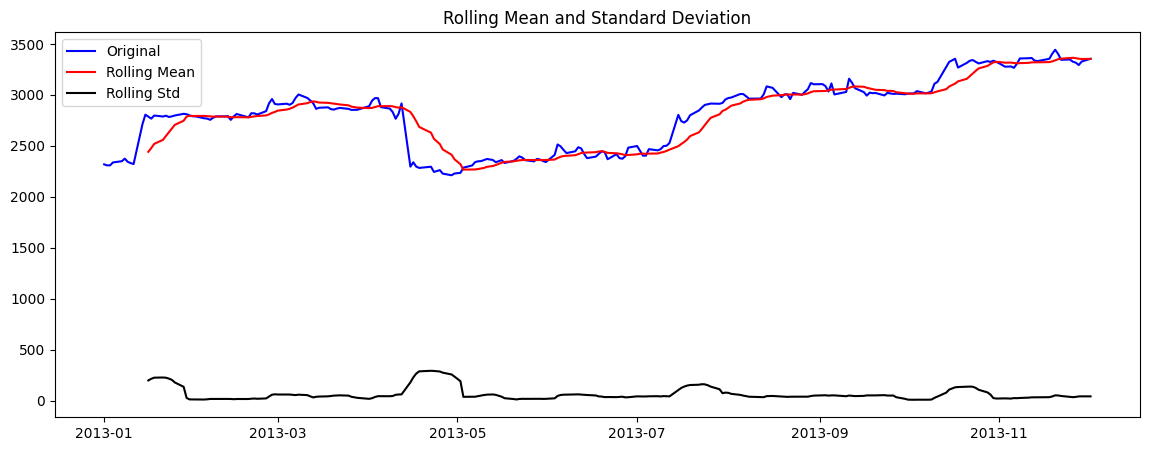

In [ ]:
#check if the data is stationary
rollmean=infy_data.rolling(12).mean()
rollstd=infy_data.rolling(12).std()

plt.figure(figsize=(14,5))
fig=plt.figure(1)

#plot rolling stats
orig=plt.plot(infy_data,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

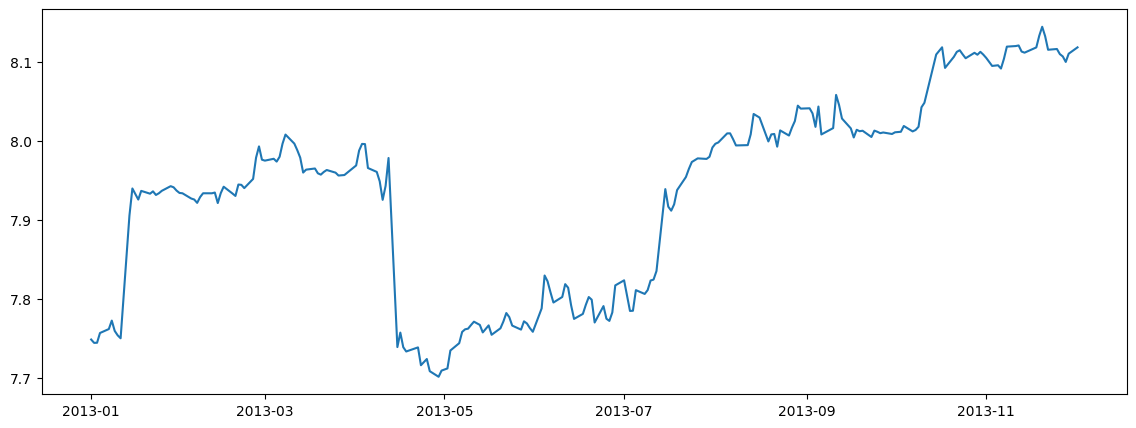

In [ ]:
#make data stationary
plt.figure(figsize=(14,5))
fig=plt.figure(1)

infy_log=np.log(infy_data)
plt.plot(infy_log)

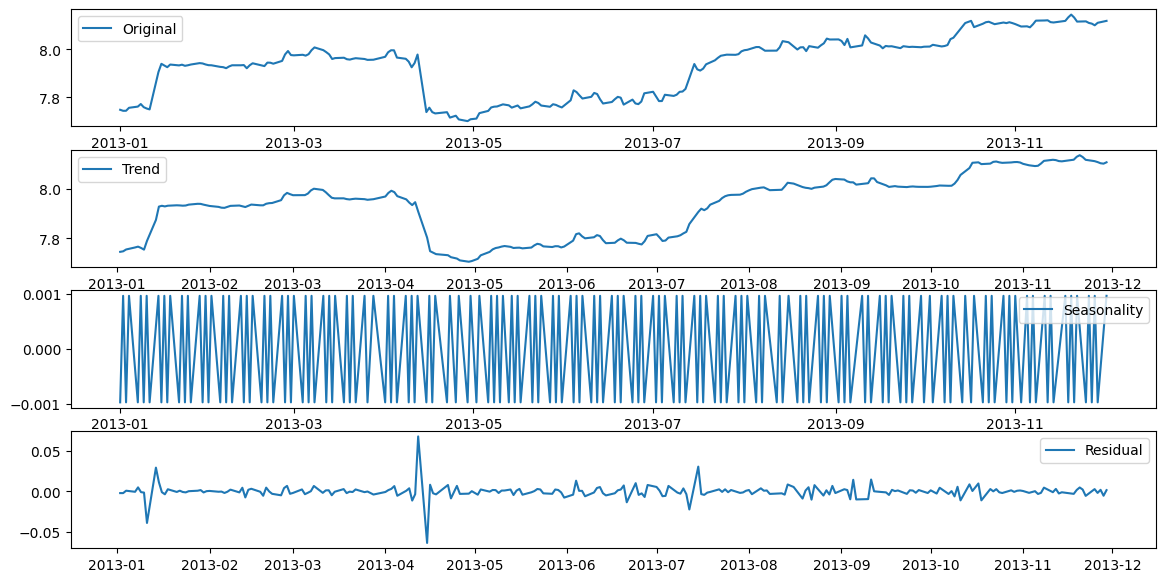

In [ ]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(infy_log,period=2)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(14,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(infy_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

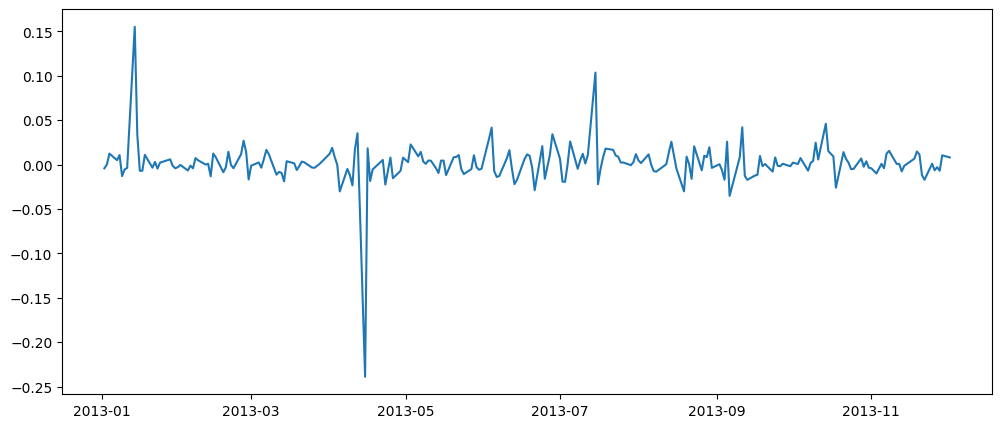

In [ ]:
#try differencing
plt.figure(figsize=(12,5))
fig=plt.figure(1)
infy_log_diff=infy_log-infy_log.shift()
plt.plot(infy_log_diff)

rollmean=infy_log_diff.rolling(12).mean()
rollstd=infy_log_diff.rolling(12).std()


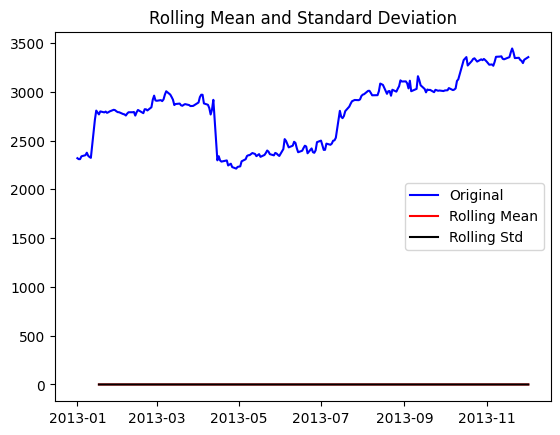

In [ ]:
#plot rolling stats
orig=plt.plot(infy_data,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [ ]:
data.sort_index(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
infy_acf=acf(infy_log_diff,nlags=20)
infy_pacf=pacf(infy_log_diff,nlags=20)

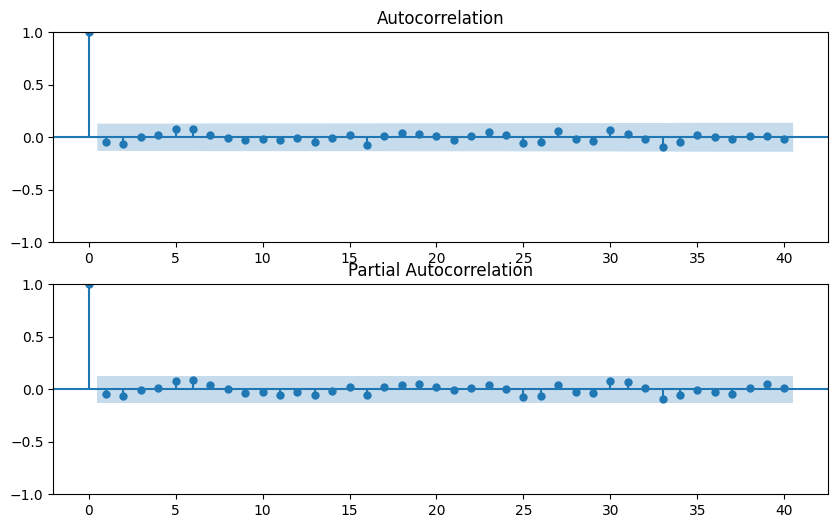

In [ ]:
import statsmodels.api as sm
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(infy_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(infy_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
  automodel=pm.auto_arima(timeseries,start_p=3,start_q=3,max_p=5,max_q=5,test="adf",seasonal=True,trace=True)
  return automodel

In [ ]:
arimamodel(infy_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1054.577, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1059.782, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1058.318, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1058.395, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1060.726, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1056.764, Time=2.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.794 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(infy_log,order=(0,1,0))
results_ARIMA=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#taking results back to original scale
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
ARIMA_diff_predictions.head()

Date
2013-01-01    0.000000
2013-01-02    7.748762
2013-01-03    7.744505
2013-01-04    7.744656
2013-01-07    7.757008
dtype: float64

In [ ]:
#cumulative sum
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
ARIMA_diff_predictions_cumsum.head()

Date
2013-01-01     0.000000
2013-01-02     7.748762
2013-01-03    15.493267
2013-01-04    23.237923
2013-01-07    30.994932
dtype: float64

In [ ]:
ARIMA_log_prediction=pd.Series(infy_log.iloc[0],index=infy_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01     7.748762
2013-01-02    15.497524
2013-01-03    23.242029
2013-01-04    30.986685
2013-01-07    38.743694
dtype: float64

In [ ]:
results_ARIMA.predict(10,30)

Date
2013-01-15    7.905479
2013-01-16    7.939693
2013-01-17    7.932739
2013-01-18    7.925682
2013-01-21    7.936642
2013-01-22    7.933098
2013-01-23    7.936052
2013-01-24    7.931482
2013-01-25    7.933653
2013-01-28    7.936732
2013-01-29    7.942593
2013-01-30    7.941171
2013-01-31    7.937017
2013-02-01    7.934030
2013-02-04    7.933618
2013-02-05    7.926946
2013-02-06    7.925736
2013-02-07    7.921499
2013-02-08    7.928766
2013-02-11    7.933618
2013-02-12    7.933600
Name: predicted_mean, dtype: float64